# Exercise 08 : Seaborn

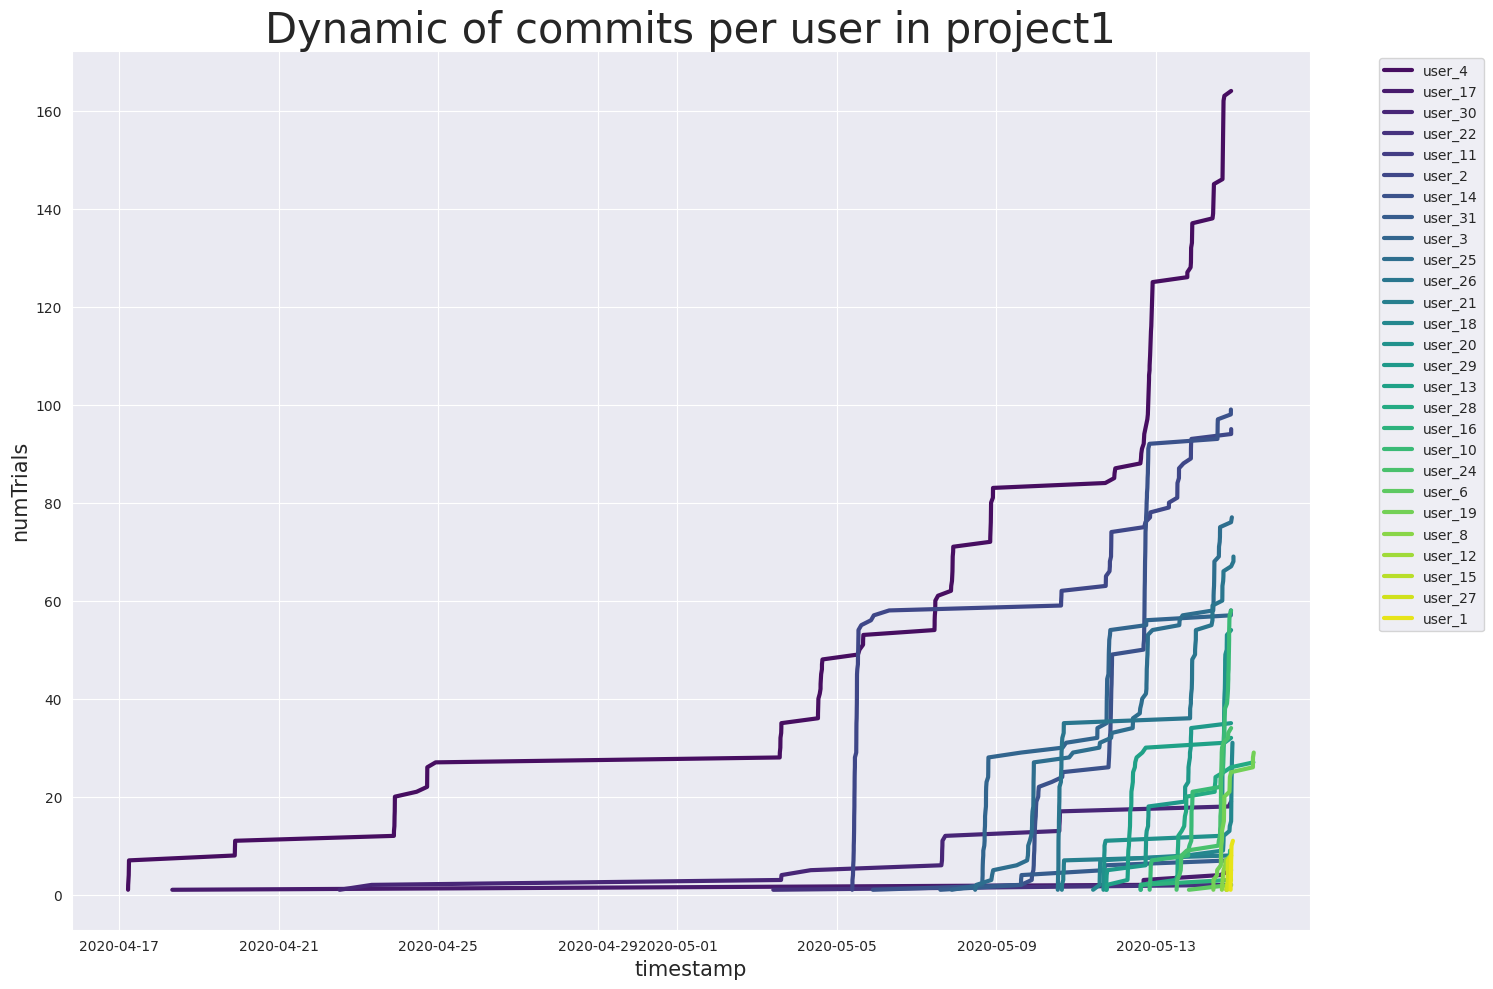

ANSWERS:
1. Which user was the leader almost all of the time? user_4
2. Which user was the leader for only a short period? user_2


In [10]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 30,
    "axes.labelsize": 15
})

con = sqlite3.connect(r"../data/checking-logs.sqlite")

chk = pd.read_sql("""
    SELECT uid, timestamp 
    FROM checker 
    WHERE uid LIKE 'user_%' 
        AND status = 'ready'
        AND labname = 'project1'
""", con, parse_dates=['timestamp'])

chk.sort_values('timestamp', inplace=True)
chk['commit_count'] = 1
chk['cumulative_commits'] = chk.groupby('uid')['commit_count'].cumsum()

plt.figure(figsize=(15, 10))
sns.set_style('darkgrid')
ax = sns.lineplot(
    data=chk, 
    x='timestamp', 
    y='cumulative_commits', 
    hue='uid', 
    linewidth=3,
    palette='viridis'
)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Dynamic of commits per user in project1')
# ax.set_title('Dynamic of commits per user in project1', pad=20)
plt.xlabel('timestamp')
plt.ylabel('numTrials')

plt.tight_layout()
plt.show()


#QUESTIONS
# Find leaders
cumulative = chk.pivot_table(
    index='timestamp', 
    columns='uid', 
    values='cumulative_commits', 
    aggfunc='max'
).ffill().fillna(0)

leader_at_time = cumulative.idxmax(axis=1)
lead_counts = leader_at_time.value_counts()

leader_long = lead_counts.idxmax()
leader_short = lead_counts.idxmin()

print("ANSWERS:")
print(f"1. Which user was the leader almost all of the time? {leader_long}")
print(f"2. Which user was the leader for only a short period? {leader_short}")

con.close()